In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

In [2]:
train = pd.read_csv('./train.csv')
train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [3]:
train.shape

(5282, 20)

Датасет состоит из 5282 объектов с 20 признаками

In [4]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
train.isna().sum() #табличка с количеством nan в каждой колонке

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [6]:
for col in num_cols:
    print(f"{col} DISTRIBUTION")
    print(train[col].describe())
    print()

ClientPeriod DISTRIBUTION
count    5282.000000
mean       32.397009
std        24.550326
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: ClientPeriod, dtype: float64

MonthlySpending DISTRIBUTION
count    5282.000000
mean       64.924754
std        30.176464
min        18.250000
25%        35.462500
50%        70.400000
75%        90.050000
max       118.750000
Name: MonthlySpending, dtype: float64

TotalSpent DISTRIBUTION
count     5282
unique    4978
top           
freq         9
Name: TotalSpent, dtype: object



Видим, что колонка `TotalSpent` имеет тип `object`, хотя как числовой признак должен иметь тип `float64`, и при этом не имеет `NaN` значений. Рассмотрим значения этой колонки

In [7]:
train['TotalSpent'].value_counts()

           9
20.2       9
19.75      8
20.05      6
19.65      6
          ..
41.85      1
4326.25    1
950.2      1
4264       1
1375.6     1
Name: TotalSpent, Length: 4978, dtype: int64

Пустая первая строчка дублируется 9 раз. Проверим данные с этими пробелами:

In [8]:
train[train['TotalSpent'] == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Видим, что у них у всех `ClientPeriod` = 0. 

Проверим, сколько записей соответствуют такому условию:

In [9]:
train[train['ClientPeriod'] == 0].shape

(9, 20)

Таких записей тоже 9. И проверим, что `ClientPeriod = 0` тогда и только тогда, когда `TotalSpent = 0`

In [10]:
train[train['ClientPeriod'] == 0].index == train[train['TotalSpent'] == ' '].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

Это действительно так!

Заменим пустые строки на нули float.

In [11]:
train.replace(' ', 0, inplace=True)

In [12]:
train['TotalSpent'] = train['TotalSpent'].astype('float')

Преодобработаем теперь test.csv

In [13]:
test = pd.read_csv('./test.csv')
test.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [14]:
test[test['TotalSpent'] == ' '].index

Int64Index([177, 767], dtype='int64')

In [15]:
test.replace(' ', 0, inplace=True)
test['TotalSpent'] = test['TotalSpent'].astype('float')

## Анализ данных (3 балла)

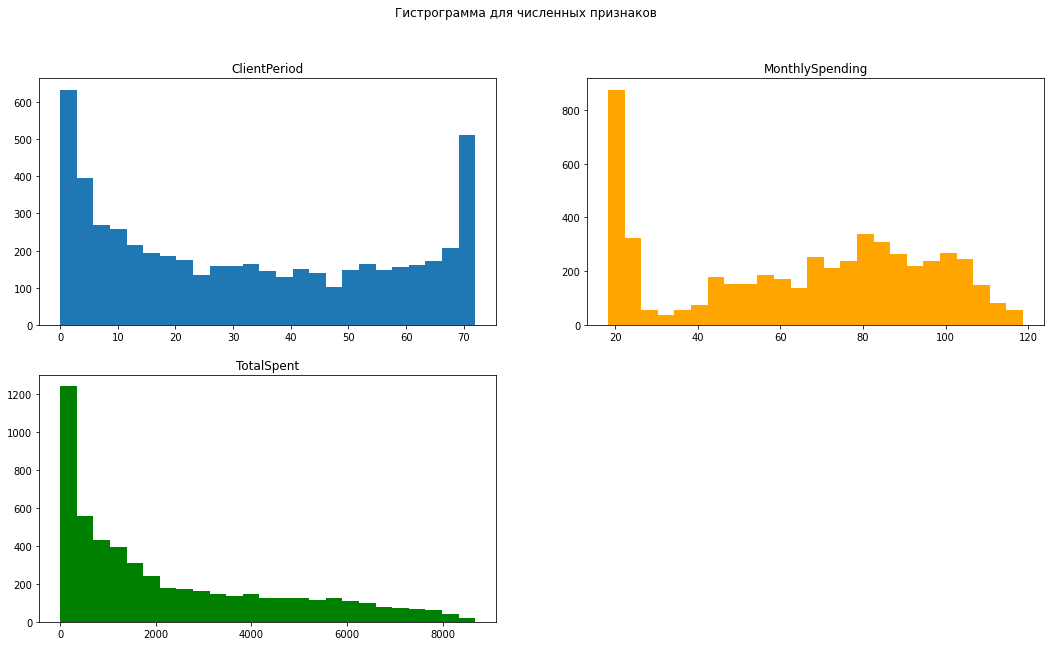

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(18,10))
fig.suptitle('Гистрограмма для численных признаков')
axs[0, 0].hist(train["ClientPeriod"], bins = 25)
axs[0, 0].set_title('ClientPeriod')
axs[0, 1].hist(train["MonthlySpending"], bins=25, color = "orange")
axs[0, 1].set_title('MonthlySpending')
axs[1, 0].hist(train['TotalSpent'], bins=25, color = "green")
axs[1, 0].set_title('TotalSpent')
axs[1, 1].remove()

([<matplotlib.patches.Wedge at 0x7f00f947bd90>,
 [Text(-0.009159362348197024, 1.0999618657396149, 'Male'),
  Text(0.009159362348196646, -1.0999618657396149, 'Female')])

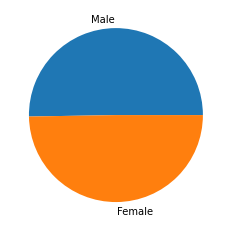

In [17]:
fig, axs = plt.subplots()
x = train['Sex'].value_counts()
indices = x.index
axs.pie(x, labels=indices)

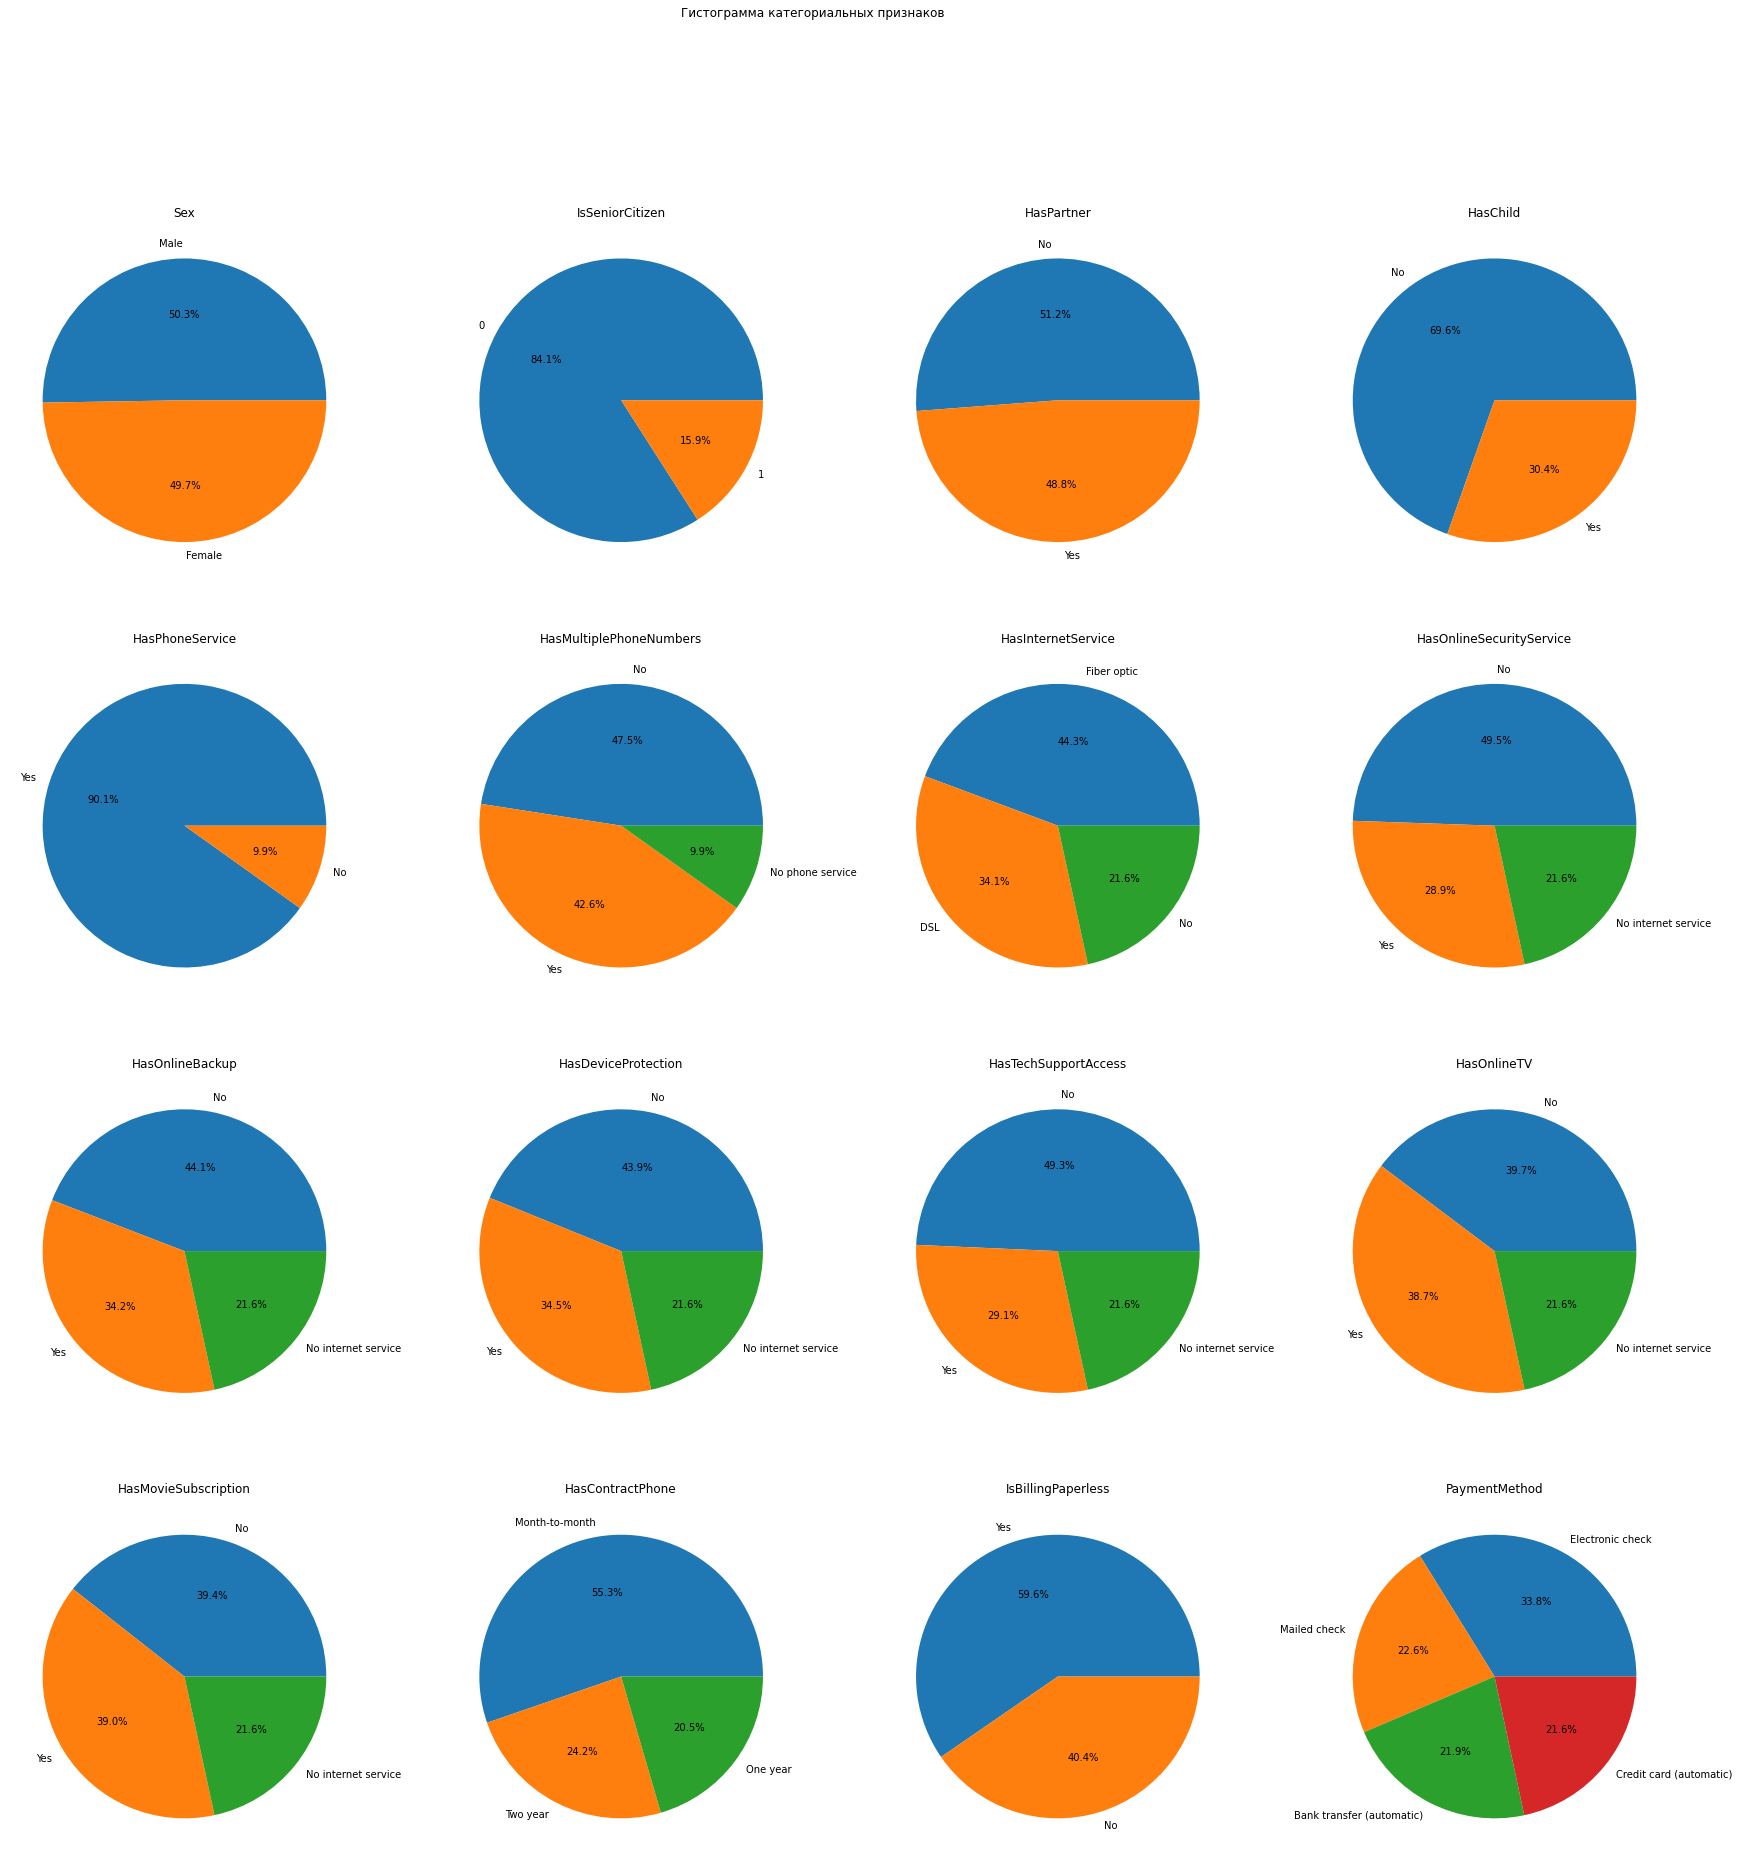

In [18]:
fig, axs = plt.subplots(nrows = 4, ncols = 4, figsize = (30, 30))
ax = axs.ravel()
fig.suptitle('Гистограмма категориальных признаков')
for i, cat in enumerate(cat_cols):
  x = train[cat].value_counts()
  indices = x.index
  ax[i].pie(x, labels = indices, autopct='%1.1f%%')
  ax[i].set_title(cat)

Посмотрим на распределение целевой переменной

In [19]:
train[target_col].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Churn')

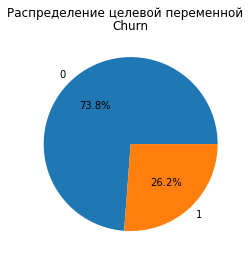

In [20]:
fig, axs = plt.subplots()
fig.suptitle('Распределение целевой переменной')
x = train[target_col].value_counts()
indices = x.index
axs.pie(x, labels = indices, autopct='%1.1f%%')
axs.set_title(target_col)

Как видим, классы являются несбалансированными, т.к. 0 класс превосходит 1 класс почти в три раза

## Применение линейных моделей (3 балла)

In [21]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

One-Hot-Encoding категориальных признаков:

In [22]:
X_cat = train[cat_cols]
numeric_data = train[num_cols]
dummy_features = pd.get_dummies(X_cat)
X = pd.concat([numeric_data, dummy_features], axis=1)
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


Нормализация числовых признаков:

In [23]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
y = train[target_col]

Подготовим сетку для кроссвалидации

In [24]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 120, 130]
parametrs = [
    {'penalty': ['l1', 'l2', 'elasticnet'],
     'C': C
     }
]

In [25]:
cls = GridSearchCV(
    LogisticRegression(),
    param_grid = parametrs,
    scoring = 'roc_auc'
)
cls.fit(X_scaled, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 120, 130],
                          'penalty': ['l1', 'l2', 'elasticnet']}],
             scoring='roc_auc')

In [26]:
print(cls.best_params_)
print(cls.best_score_)

{'C': 120, 'penalty': 'l2'}
0.8451278435471735


##Применение градиентного бустинга (2 балла)

In [27]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.1 MB/s 


In [28]:
import catboost
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from random import randint

In [29]:
data_catboost = train.copy()
X = data_catboost.iloc[:, :-1]
y = data_catboost.iloc[:, -1]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=42)
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [30]:
model = CatBoostClassifier(cat_features=cat_cols, verbose=False)
model.fit(X_train, y_train)

In [31]:
probs = model.predict_proba(X_valid)[:, -1]
roc_auc_score(y_valid, probs)

0.823387759625419

Найдем оптимальные значения с помощью GridSearch

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [36]:
boosting_model = catboost.CatBoostClassifier(n_estimators=60, 
                                             silent=True, 
                                             cat_features=cat_cols, 
                                             eval_metric='AUC:hints=skip_train~false')
param_grid = { 
               'learning_rate': np.linspace(0, 1, 11),
               'l2_leaf_reg': np.linspace(0, 1, 11)             
              }
boosting_model.grid_search(param_grid, X_train, y_train)


bestTest = 0.8285275765
bestIteration = 55

0:	loss: 0.8285276	best: 0.8285276 (0)	total: 290ms	remaining: 34.8s

bestTest = 0.82013817
bestIteration = 47

1:	loss: 0.8201382	best: 0.8285276 (0)	total: 618ms	remaining: 36.8s

bestTest = 0.8238763803
bestIteration = 24

2:	loss: 0.8238764	best: 0.8285276 (0)	total: 954ms	remaining: 37.5s

bestTest = 0.8178233552
bestIteration = 19

3:	loss: 0.8178234	best: 0.8285276 (0)	total: 1.29s	remaining: 37.7s

bestTest = 0.8146135266
bestIteration = 7

4:	loss: 0.8146135	best: 0.8285276 (0)	total: 1.62s	remaining: 37.5s

bestTest = 0.8194911721
bestIteration = 12

5:	loss: 0.8194912	best: 0.8285276 (0)	total: 1.95s	remaining: 37.4s

bestTest = 0.8185530251
bestIteration = 12

6:	loss: 0.8185530	best: 0.8285276 (0)	total: 2.32s	remaining: 37.8s

bestTest = 0.7968606223
bestIteration = 7

7:	loss: 0.7968606	best: 0.8285276 (0)	total: 2.64s	remaining: 37.3s

bestTest = 0.8029963193
bestIteration = 7

8:	loss: 0.8029963	best: 0.8285276 (0)	total: 2.

{'params': {'learning_rate': 0.2, 'l2_leaf_reg': 0.8},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               

##Предсказания

In [37]:
best_model = boosting_model
best_model.fit(X, y)

In [38]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')
y_predict = best_model.predict_proba(X_test)[:,1] 
submission['Churn'] = y_predict

submission.to_csv('./my_submission.csv', index=False)

In [39]:
cl = pd.read_csv('./my_submission.csv')
cl.head()

,Id,Churn
0,0,0.042012
1,1,0.732210
2,2,0.679266
3,3,0.014107
4,4,0.006352


Окончательно на каггле: `Score: 0.85233`